In [1]:
import numpy as np
import matplotlib.pyplot as plt

def func(x, y, alpha):
    if x <= 0:
        f1 = (alpha / (1 - x)) + y
        return f1
    
    elif 0< x < alpha + y:
        f2 = alpha + y
        return f2
    
    else:  # x >= alpha + y 
        f3 = -1
        return f3


def rulkov(xn, yn, T , alpha, mu, sigma):

    xlist = [xn]
    ylist = [yn]

    for i in range(1,T):
        xnew = func(xn, yn, alpha)
        xlist.append(xnew)
        ynew = yn - mu*(xn +1) + mu*sigma
        ylist.append(ynew)
        xn = xnew
        yn = ynew
    return xlist, ylist   




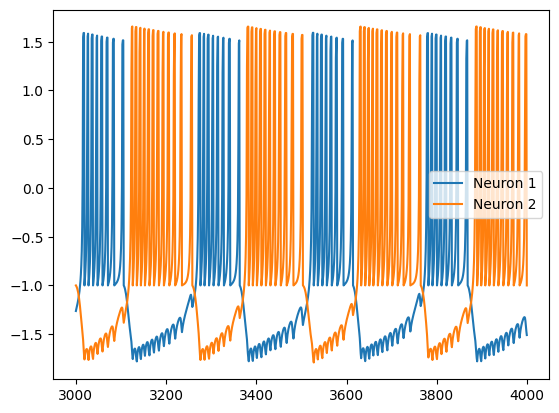

In [2]:
#fig10a, 12



T = 4000
time = np.arange(T)
x1 = -0.5
y1 = 0
alpha1 = 4.9
mu = 0.001
sigma1 = 0.024



x2 = -1
y2 = 0
alpha2 = 5
sigma2 = 0.245

g = -0.029


x1list = [x1]
x2list = [x2]
y1list = [y1]
y2list = [y2]


for i in range(1,T):
    beta1 = g*(x2-x1)
    sig1 = g*(x2-x1)
    xnew1 = func(x1, y1 + beta1, alpha1) 
    ynew1 = y1 - mu*(x1 +1) + mu*sigma1 + mu*sig1
 
    beta2 = g*(x1-x2)
    sig2 = g*(x1-x2)
    xnew2 = func(x2, y2 + beta2, alpha2) 
    ynew2 = y2 - mu*(x2 +1) + mu*sigma2 + mu*sig2

    x1 = xnew1
    y1 = ynew1 
    x2 = xnew2
    y2 = ynew2
    x1list.append(x1)
    x2list.append(x2)
    y1list.append(y1)
    y2list.append(y2)

r = 3000
l = 4000
plt.plot(time[r:l], x1list[r:l], label='Neuron 1')
plt.plot(time[r:l], x2list[r:l], label='Neuron 2')
plt.legend()

# #gives error while plotting as it reaches inf around 1026

# print(x1list)

# index = x1list.index(-1.3996823174534597e+308)
# print(index)

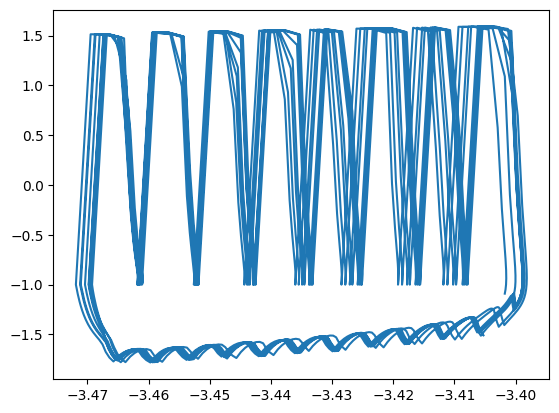

In [3]:
plt.plot(y1list[2000:],x1list[2000:])

plt.show()

##fourth order low pass filter??

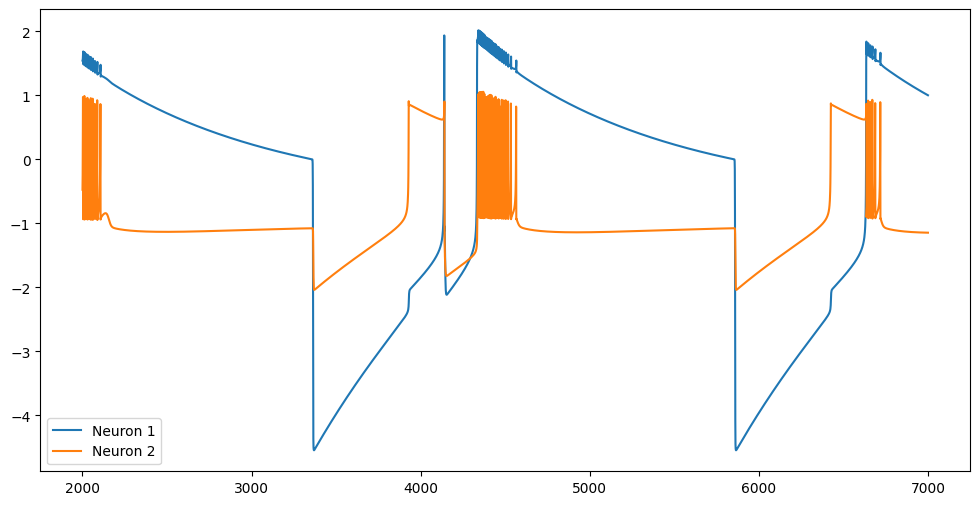

In [5]:
T = 8000
time = np.arange(T)\


#bursting
x1 = 0.7887
y1 = 0.4678
alpha1 = 6
sigma1 = 0.386

#silent
x2 = -1
y2 = 0.3
alpha2 = 4 
mu = 0.001
sigma2 = -0.01



coupling_const = 0.1

x1list = [x1]
x2list = [x2]


for i in range(1,T):
    xnew1 = func(x1, y1, alpha1) + coupling_const * (x2 - x1) 
    ynew1 = y1 - mu*(x1 +1) + mu*sigma1
 
    xnew2 = func(x2, y2, alpha2) + coupling_const* (x1 - x2) 
    ynew2 = y2 - mu*(x2 +1) + mu*sigma2

    x1 = xnew1
    y1 = ynew1 
    x2 = xnew2
    y2 = ynew2
    x1list.append(x1)
    x2list.append(x2)

r = 2000
l = 7000
plt.figure(figsize=(12, 6))
plt.plot(time[r:l], x1list[r:l], label='Neuron 1')
plt.plot(time[r:l], x2list[r:l], label='Neuron 2')
plt.legend()